# Fst calculations

Fst is calculated between sets of populations using vcftools. 
The output is a .txt-like file containing Fst per position. 

## Import files

First the files are imported and NaN is removed

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
YRI_LWK <- read.table("Fst/YRI-LWK.weir.fst", header=TRUE)
YRI_LWK <- na.omit(YRI_LWK)

In [3]:
YRI_GWD <- read.table("Fst/YRI-GWD.weir.fst", header=TRUE)
YRI_GWD <- na.omit(YRI_GWD)

In [4]:
YRI_MSL <- read.table("Fst/YRI-MSL.weir.fst", header = TRUE)
YRI_MSL <- na.omit(YRI_MSL)

In [5]:
YRI_ESN <- read.table("Fst/YRI-ESN.weir.fst", header = TRUE) 
YRI_ESN <- na.omit(YRI_ESN)

In [6]:
LWK_GWD <- read.table("Fst/LWK-GWD.weir.fst", header = TRUE)
LWK_GWD <- na.omit(LWK_GWD)

In [7]:
LWK_MSL <- read.table("Fst/LWK-MSL.weir.fst", header = TRUE) 
LWK_MSL <- na.omit(LWK_MSL)

In [8]:
LWK_ESN <- read.table("Fst/LWK-ESN.weir.fst", header=TRUE)
LWK_ESN <- na.omit(LWK_ESN)

In [9]:
GWD_MSL <- read.table("Fst/GWD-MSL.weir.fst", header = TRUE) 
GWD_MSL <- na.omit(GWD_MSL)

In [10]:
GWD_ESN <- read.table("Fst/GWD-ESN.weir.fst", header = TRUE) 
GWD_ESN <- na.omit(GWD_ESN) 

In [11]:
MSL_ESN <- read.table("Fst/MSL-ESN.weir.fst", header = TRUE) 
MSL_ESN <- na.omit(MSL_ESN)

## Setup for sliding windows

We define a function that can calculate Fst for sliding windows with a given size and a given step size

In [12]:
slide_windows <- function(fst_data, window_size, step_size){
    n_sites <- nrow(fst_data)
    n_windows <- floor((n_sites - window_size)/step_size)+1
    
    window_start <- seq(1, n_sites - window_size+1, by=step_size)
    window_end <- window_start + window_size - 1
    
    fst_window <- data.frame(matrix(ncol = 4, nrow = n_windows))
    colnames(fst_window) <- c("CHROM", "WINDOW_START", "WINDOW_END", "MEAN_FST")
    
    for (i in 1:n_windows) {
        fst_window$CHROM[i] <- fst_data$CHROM[window_start[i]]
        fst_window$WINDOW_START[i] <- fst_data$POS[window_start[i]]
        fst_window$WINDOW_END[i] <- fst_data$POS[window_end[i]]
        fst_window$MEAN_FST[i] <- mean(fst_data$WEIR_AND_COCKERHAM_FST[window_start[i]:window_end[i]])
    }
    return(fst_window)
}

## Calculate FST

In [13]:
window_size <- 100 
window_step <- 50

In [14]:
fst_YRI_LWK <- slide_windows(YRI_LWK, window_size, window_step) %>%
   mutate(MEAN_FST = ifelse(MEAN_FST < 0, 0, MEAN_FST),
         in_Range = ((WINDOW_START >= 4.6e+07 & WINDOW_START < 4.7e+07)|
                   (WINDOW_START >= 4.8e+07 & WINDOW_START < 4.9e+07)|
                   (WINDOW_START >= 5.0e+07 & WINDOW_START < 5.1e+07)|
                   (WINDOW_START >= 5.2e+07 & WINDOW_START < 5.3e+07)))
fst_YRI_GWD <- slide_windows(YRI_GWD, window_size, window_step) %>%
   mutate(MEAN_FST = ifelse(MEAN_FST < 0, 0, MEAN_FST),
         in_Range = ((WINDOW_START >= 4.6e+07 & WINDOW_START < 4.7e+07)|
                   (WINDOW_START >= 4.8e+07 & WINDOW_START < 4.9e+07)|
                   (WINDOW_START >= 5.0e+07 & WINDOW_START < 5.1e+07)|
                   (WINDOW_START >= 5.2e+07 & WINDOW_START < 5.3e+07)))
fst_YRI_MSL <- slide_windows(YRI_MSL, window_size, window_step) %>%
   mutate(MEAN_FST = ifelse(MEAN_FST < 0, 0, MEAN_FST),
         in_Range = ((WINDOW_START >= 4.6e+07 & WINDOW_START < 4.7e+07)|
                   (WINDOW_START >= 4.8e+07 & WINDOW_START < 4.9e+07)|
                   (WINDOW_START >= 5.0e+07 & WINDOW_START < 5.1e+07)|
                   (WINDOW_START >= 5.2e+07 & WINDOW_START < 5.3e+07)))
fst_YRI_ESN <- slide_windows(YRI_ESN, window_size, window_step) %>%
   mutate(MEAN_FST = ifelse(MEAN_FST < 0, 0, MEAN_FST), 
         in_Range = ((WINDOW_START >= 4.6e+07 & WINDOW_START < 4.7e+07)|
                   (WINDOW_START >= 4.8e+07 & WINDOW_START < 4.9e+07)|
                   (WINDOW_START >= 5.0e+07 & WINDOW_START < 5.1e+07)|
                   (WINDOW_START >= 5.2e+07 & WINDOW_START < 5.3e+07)))
fst_LWK_GWD <- slide_windows(LWK_GWD, window_size, window_step) %>%
   mutate(MEAN_FST = ifelse(MEAN_FST < 0, 0, MEAN_FST),
         in_Range = ((WINDOW_START >= 4.6e+07 & WINDOW_START < 4.7e+07)|
                   (WINDOW_START >= 4.8e+07 & WINDOW_START < 4.9e+07)|
                   (WINDOW_START >= 5.0e+07 & WINDOW_START < 5.1e+07)|
                   (WINDOW_START >= 5.2e+07 & WINDOW_START < 5.3e+07)))
fst_LWK_MSL <- slide_windows(LWK_MSL, window_size, window_step) %>%
   mutate(MEAN_FST = ifelse(MEAN_FST < 0, 0, MEAN_FST), 
         in_Range = ((WINDOW_START >= 4.6e+07 & WINDOW_START < 4.7e+07)|
                   (WINDOW_START >= 4.8e+07 & WINDOW_START < 4.9e+07)|
                   (WINDOW_START >= 5.0e+07 & WINDOW_START < 5.1e+07)|
                   (WINDOW_START >= 5.2e+07 & WINDOW_START < 5.3e+07)))
fst_LWK_ESN <- slide_windows(LWK_ESN, window_size, window_step) %>%
   mutate(MEAN_FST = ifelse(MEAN_FST < 0, 0, MEAN_FST), 
         in_Range = ((WINDOW_START >= 4.6e+07 & WINDOW_START < 4.7e+07)|
                   (WINDOW_START >= 4.8e+07 & WINDOW_START < 4.9e+07)|
                   (WINDOW_START >= 5.0e+07 & WINDOW_START < 5.1e+07)|
                   (WINDOW_START >= 5.2e+07 & WINDOW_START < 5.3e+07)))
fst_GWD_MSL <- slide_windows(GWD_MSL, window_size, window_step) %>%
   mutate(MEAN_FST = ifelse(MEAN_FST < 0, 0, MEAN_FST), 
         in_Range = ((WINDOW_START >= 4.6e+07 & WINDOW_START < 4.7e+07)|
                   (WINDOW_START >= 4.8e+07 & WINDOW_START < 4.9e+07)|
                   (WINDOW_START >= 5.0e+07 & WINDOW_START < 5.1e+07)|
                   (WINDOW_START >= 5.2e+07 & WINDOW_START < 5.3e+07)))
fst_GWD_ESN <- slide_windows(GWD_ESN, window_size, window_step) %>%
   mutate(MEAN_FST = ifelse(MEAN_FST < 0, 0, MEAN_FST), 
         in_Range = ((WINDOW_START >= 4.6e+07 & WINDOW_START < 4.7e+07)|
                   (WINDOW_START >= 4.8e+07 & WINDOW_START < 4.9e+07)|
                   (WINDOW_START >= 5.0e+07 & WINDOW_START < 5.1e+07)|
                   (WINDOW_START >= 5.2e+07 & WINDOW_START < 5.3e+07)))
fst_MSL_ESN <- slide_windows(MSL_ESN, window_size, window_step) %>%
   mutate(MEAN_FST = ifelse(MEAN_FST < 0, 0, MEAN_FST), 
         in_Range = ((WINDOW_START >= 4.6e+07 & WINDOW_START < 4.7e+07)|
                   (WINDOW_START >= 4.8e+07 & WINDOW_START < 4.9e+07)|
                   (WINDOW_START >= 5.0e+07 & WINDOW_START < 5.1e+07)|
                   (WINDOW_START >= 5.2e+07 & WINDOW_START < 5.3e+07)))

## Find significant using permutations

In [15]:
#Make a data frame containing all the Fst values and the positions 
Fst <- data.frame(POS = c(YRI_LWK$POS, YRI_GWD$POS, YRI_MSL$POS, YRI_ESN$POS, LWK_GWD$POS, LWK_MSL$POS, 
                               LWK_ESN$POS, GWD_MSL$POS, GWD_ESN$POS, MSL_ESN$POS), 
                  WEIR_AND_COCKERHAM_FST = c(YRI_LWK$WEIR_AND_COCKERHAM_FST, YRI_GWD$WEIR_AND_COCKERHAM_FST, YRI_MSL$WEIR_AND_COCKERHAM_FST, 
                          YRI_ESN$WEIR_AND_COCKERHAM_FST, LWK_GWD$WEIR_AND_COCKERHAM_FST, LWK_MSL$WEIR_AND_COCKERHAM_FST, 
                          LWK_ESN$WEIR_AND_COCKERHAM_FST, GWD_MSL$WEIR_AND_COCKERHAM_FST, GWD_ESN$WEIR_AND_COCKERHAM_FST, 
                          MSL_ESN$WEIR_AND_COCKERHAM_FST), 
                 CHROM = c(YRI_LWK$CHROM, YRI_GWD$CHROM, YRI_MSL$CHROM, YRI_ESN$CHROM, LWK_GWD$CHROM, 
                           LWK_MSL$CHROM, LWK_ESN$CHROM, GWD_MSL$CHROM, GWD_ESN$CHROM, MSL_ESN$CHROM)) %>%
arrange(POS)

head(Fst)

,POS,WEIR_AND_COCKERHAM_FST,CHROM
,<int>,<dbl>,<int>
1,46000028,4.42055e-04,3
2,46000028,1.11026e-16,3
3,46000028,6.72933e-04,3
4,46000028,-7.77580e-04,3
5,46000225,-2.01254e-04,3
6,46000225,1.42863e-03,3


In [19]:
n = 10000
permuted <- tibble()
sample_Fst <- Fst

window_size <- 100 
window_step <- 50

for (i in 1:n){
    sample_Fst$fst <- sample(sample_Fst$fst)
    windows <- slide_windows(sample_Fst, window_size, window_step)
    permuted <- bind_rows(permuted, tibble(fst = windows$MEAN_FST, pos = windows$WINDOW_START))
    if(i%%50==0) {   # Progress tracker
    cat(".")       
    flush.console()
  }
}

permuted <- permuted %>%
   arrange(fst)

saveRDS(permuted, "permuted_fst_windows.rds")

....................................................................................................

In [16]:
permuted <- readRDS("permuted_fst_windows.rds")

Plots of the permuted data are based on 1000 permutations instead of 10,000

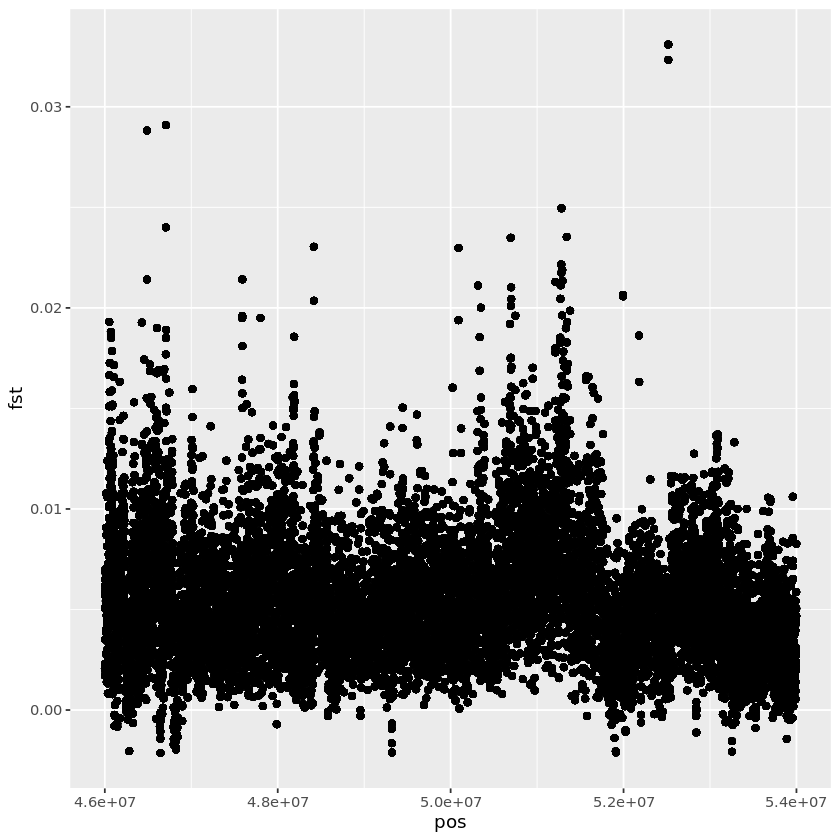

In [20]:
ggplot(permuted_plot) +
geom_point(aes(x=pos, y=fst))

null device 
          1

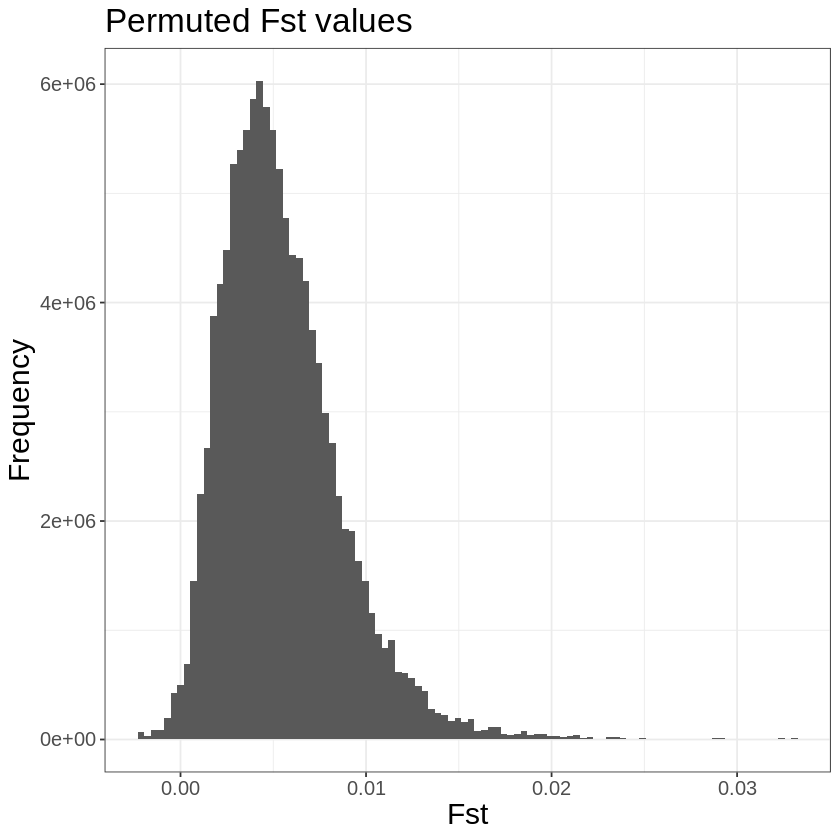

In [18]:
#Gives the null distribution
#pdf(file="plots/permutedFst.pdf", width = 8, height = 8)
ggplot(permuted) + 
   geom_histogram(aes(fst), bins = 100) +
   theme_bw() +
   labs(title = "Permuted Fst values", x = "Fst", y="Frequency") +
   theme(axis.title = element_text(size=18), axis.text = element_text(size=12), plot.title = element_text(size=20))
#dev.off()

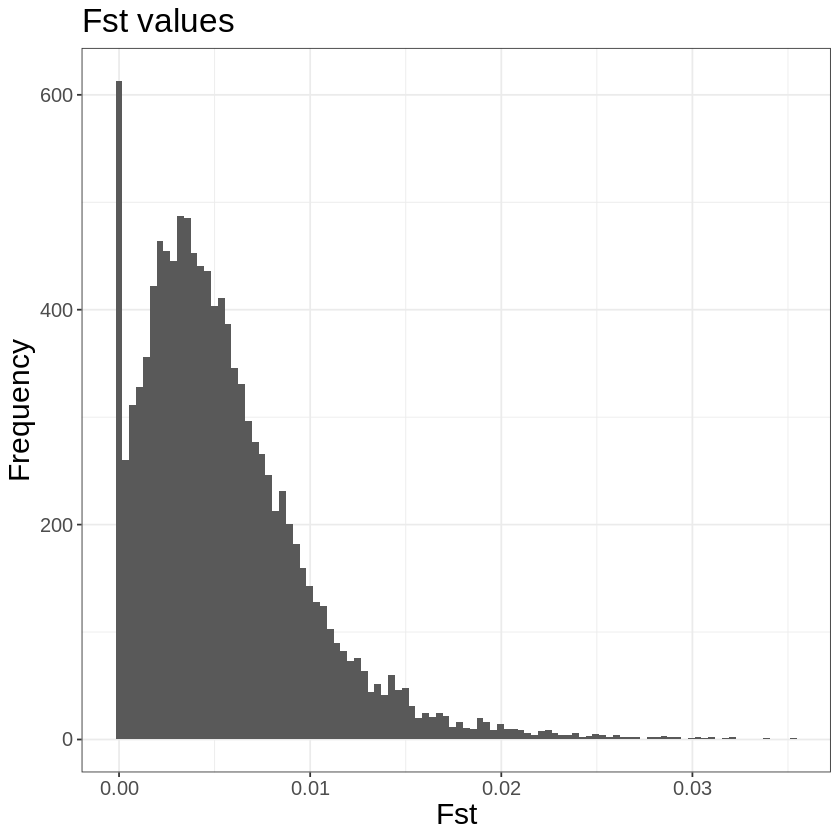

In [22]:
ggplot(fst_long) + 
   geom_histogram(aes(fst), bins = 100) +
   theme_bw() +
   labs(title = "Fst values", x = "Fst", y="Frequency") +
   theme(axis.title = element_text(size=18), axis.text = element_text(size=12), plot.title = element_text(size=20))

In [23]:
critical_value <- quantile(permuted$fst, 0.99)

critical_value

99% 
0.01555081

In [29]:
pdf(file="plots/Fstall.pdf", width = 8, height = 8)
#library(repr)
#options(repr.plot.width = 8, repr.plot.height = 8)
ggplot() + 
   geom_point(data = fst_YRI_LWK, aes(x=WINDOW_START, y=MEAN_FST), color = ifelse(fst_YRI_LWK$in_Range, "navyblue", "cornflowerblue")) +
   geom_point(data = fst_YRI_GWD, aes(x=WINDOW_START, y=MEAN_FST), color = ifelse(fst_YRI_GWD$in_Range, "navyblue", "cornflowerblue")) +
   geom_point(data = fst_YRI_MSL, aes(x=WINDOW_START, y=MEAN_FST), color = ifelse(fst_YRI_MSL$in_Range, "navyblue", "cornflowerblue")) +
   geom_point(data = fst_YRI_ESN, aes(x=WINDOW_START, y=MEAN_FST), color = ifelse(fst_YRI_ESN$in_Range, "navyblue", "cornflowerblue")) +
   geom_point(data = fst_LWK_GWD, aes(x=WINDOW_START, y=MEAN_FST), color = ifelse(fst_LWK_GWD$in_Range, "navyblue", "cornflowerblue")) +
   geom_point(data = fst_LWK_MSL, aes(x=WINDOW_START, y=MEAN_FST), color = ifelse(fst_LWK_MSL$in_Range, "navyblue", "cornflowerblue")) +
   geom_point(data = fst_LWK_ESN, aes(x=WINDOW_START, y=MEAN_FST), color = ifelse(fst_LWK_ESN$in_Range, "navyblue", "cornflowerblue")) +
   geom_point(data = fst_GWD_MSL, aes(x=WINDOW_START, y=MEAN_FST), color = ifelse(fst_GWD_MSL$in_Range, "navyblue", "cornflowerblue")) +
   geom_point(data = fst_GWD_ESN, aes(x=WINDOW_START, y=MEAN_FST), color = ifelse(fst_GWD_ESN$in_Range, "navyblue", "cornflowerblue")) +
   geom_point(data = fst_MSL_ESN, aes(x=WINDOW_START, y=MEAN_FST), color = ifelse(fst_MSL_ESN$in_Range, "navyblue", "cornflowerblue")) +
   geom_hline(yintercept = critical_value, color = "red", linetype = "longdash", linewidth = 1) +
   labs(x="Position", y="Fst", title = "Fst for all comparisons") +
   theme_bw() +
   theme(axis.title = element_text(size=18), axis.text = element_text(size=12), plot.title = element_text(size=20))
dev.off()

png 
  2

In [21]:
fst_long <- data.frame(fst = c(fst_YRI_LWK$MEAN_FST, fst_YRI_GWD$MEAN_FST, fst_YRI_MSL$MEAN_FST, fst_YRI_ESN$MEAN_FST, 
                               fst_LWK_GWD$MEAN_FST, fst_LWK_MSL$MEAN_FST, fst_LWK_ESN$MEAN_FST, fst_GWD_MSL$MEAN_FST, 
                               fst_GWD_ESN$MEAN_FST, fst_MSL_ESN$MEAN_FST), 
                       pos = c(fst_YRI_LWK$WINDOW_START, fst_YRI_GWD$WINDOW_START, fst_YRI_MSL$WINDOW_START, fst_YRI_ESN$WINDOW_START, 
                               fst_LWK_GWD$WINDOW_START, fst_LWK_MSL$WINDOW_START, fst_LWK_ESN$WINDOW_START, fst_GWD_MSL$WINDOW_START, 
                               fst_GWD_ESN$WINDOW_START, fst_MSL_ESN$WINDOW_START),
                       in_Range = c(fst_YRI_LWK$in_Range, fst_YRI_GWD$in_Range, fst_YRI_MSL$in_Range, fst_YRI_ESN$in_Range, 
                               fst_LWK_GWD$in_Range, fst_LWK_MSL$in_Range, fst_LWK_ESN$in_Range, fst_GWD_MSL$in_Range, 
                               fst_GWD_ESN$in_Range, fst_MSL_ESN$in_Range),
                       compare = c(rep("YRI/LWK", nrow(fst_YRI_LWK)), rep("YRI/GWD", nrow(fst_YRI_GWD)), rep("YRI/MSL", nrow(fst_YRI_MSL)), 
                                   rep("YRI/ESN", nrow(fst_YRI_ESN)), rep("LWK/GWD", nrow(fst_LWK_GWD)), rep("LWK/MSL", nrow(fst_LWK_MSL)), 
                                   rep("LWK/ESN", nrow(fst_LWK_ESN)), rep("GWD/MSL", nrow(fst_GWD_MSL)), rep("GWD/ESN", nrow(fst_GWD_ESN)), 
                                   rep("MSL/ESN", nrow(fst_MSL_ESN))))

In [33]:
pdf(file="plots/Fstpop.pdf", width = 8, height = 6.5)
#library(repr)
#options(repr.plot.width = 8, repr.plot.height = 6.5)
ggplot(fst_long) +
   geom_point(aes(x=pos, y=fst), color = ifelse(fst_long$in_Range, "navyblue", "cornflowerblue"), size = 0.8) +
   geom_hline(yintercept = critical_value, color = "red", linetype = "longdash") +
   theme_bw() +
   facet_wrap(~compare, ncol = 5) +
   labs(x = "Position", y="Fst", title = "Fst for comparisons between populations") +
   theme(axis.text.x = element_text(angle = 90)) +
   theme(axis.title = element_text(size=18), axis.text = element_text(size=12), plot.title = element_text(size=20))
dev.off()

png 
  2

We now calculate how many windows has mean Fst higher than the critical value, and find the percentage in that tail. 

In [29]:
n_significant <- sum(fst_long$fst >= critical_value)

In [31]:
n_significant/nrow(fst_long)

[1] 0.03011522

The critical value was found from the permuted null distribution as the highest 1 %. 
In the data we observe 3% in the tail, which indicates more high Fst values than expected by chance.

In [35]:
YRI_LWK <- sum(fst_YRI_LWK$MEAN_FST >= critical_value)/nrow(fst_YRI_LWK)
YRI_GWD <- sum(fst_YRI_GWD$MEAN_FST >= critical_value)/nrow(fst_YRI_GWD)
YRI_MSL <- sum(fst_YRI_MSL$MEAN_FST >= critical_value)/nrow(fst_YRI_MSL)
YRI_ESN <- sum(fst_YRI_ESN$MEAN_FST >= critical_value)/nrow(fst_YRI_ESN)
LWK_GWD <- sum(fst_LWK_GWD$MEAN_FST >= critical_value)/nrow(fst_LWK_GWD)
LWK_MSL <- sum(fst_LWK_MSL$MEAN_FST >= critical_value)/nrow(fst_LWK_MSL)
LWK_ESN <- sum(fst_LWK_ESN$MEAN_FST >= critical_value)/nrow(fst_LWK_ESN)
GWD_MSL <- sum(fst_GWD_MSL$MEAN_FST >= critical_value)/nrow(fst_GWD_MSL)
GWD_ESN <- sum(fst_GWD_ESN$MEAN_FST >= critical_value)/nrow(fst_GWD_ESN)
MSL_ESN <- sum(fst_MSL_ESN$MEAN_FST >= critical_value)/nrow(fst_MSL_ESN)

In [40]:
tails <- data.frame(Comparison = c("YRI-LWK", "YRI-GWD", "YRI-MSL", "YRI-ESN", "LWK-GWD", "LWK-MSL", "LWK-ESN", "GWD-MSL", "GWD-ESN", "MSL-ESN"), 
                    "Percent in tail" = c(YRI_LWK, YRI_GWD, YRI_MSL, YRI_ESN, LWK_GWD, LWK_MSL, LWK_ESN, GWD_MSL, GWD_ESN, MSL_ESN))

tails

Comparison,Percent.in.tail
<chr>,<dbl>
YRI-LWK,0.0197594502
YRI-GWD,0.0405172414
YRI-MSL,0.0055813953
YRI-ESN,0.0000000000
LWK-GWD,0.0881889764
LWK-MSL,0.0571428571
LWK-ESN,0.0233766234
GWD-MSL,0.0000000000
GWD-ESN,0.0522260274
